<a href="https://colab.research.google.com/github/EliasSf73/test_/blob/master/C_elegans_Connectome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas openpyxl networkx matplotlib


  Neuron 1 Neuron 2 Type  Nbr
0     ADAR     ADAL   EJ    1
1     ADFL     ADAL   EJ    1
2     ASHL     ADAL   EJ    1
3     AVDR     ADAL   EJ    2
4     PVQL     ADAL   EJ    1


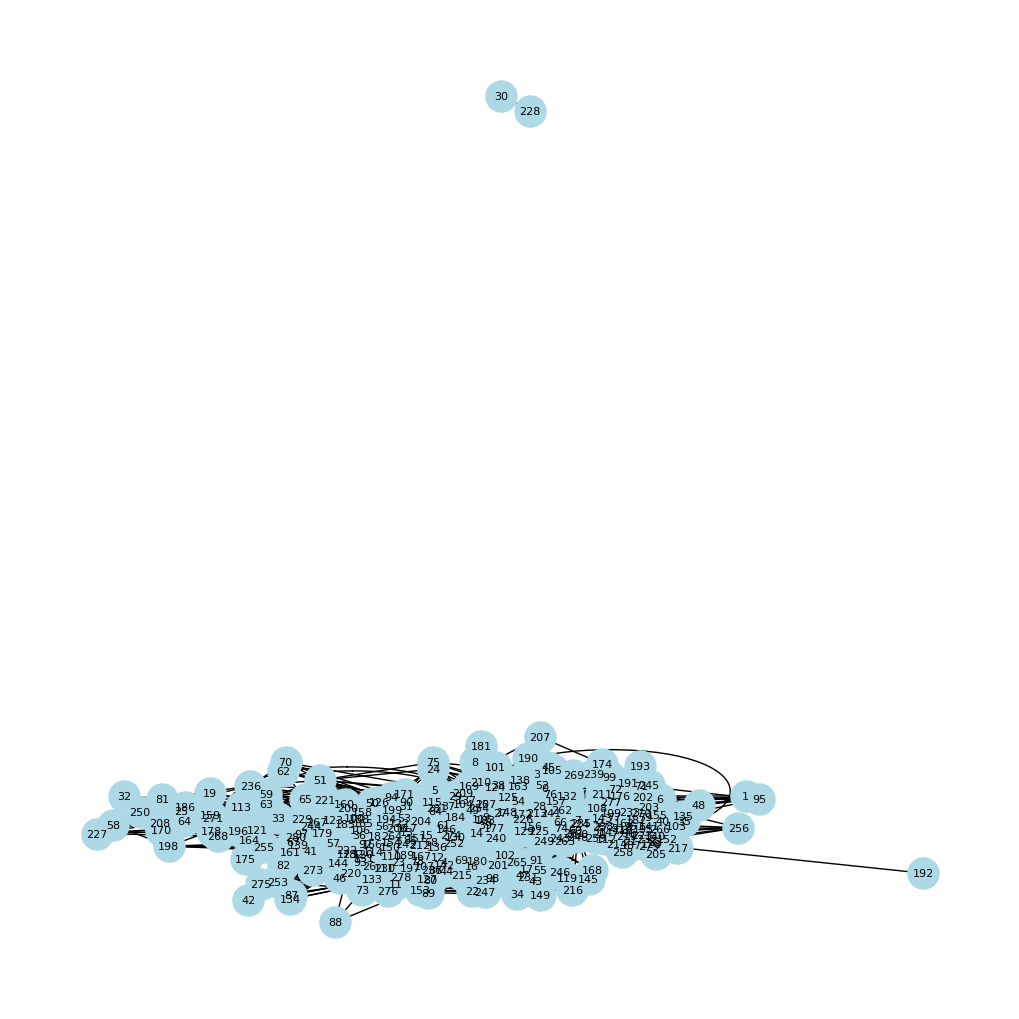

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/drive/MyDrive/Leeds worm lab/NeuronConnect.xls'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Create an adjacency matrix
nodes = list(set(df['Neuron 1']).union(set(df['Neuron 2'])))
adj_matrix = pd.DataFrame(0, index=nodes, columns=nodes)

for i, row in df.iterrows():
    adj_matrix.at[row['Neuron 1'], row['Neuron 2']] = row['Nbr']
    adj_matrix.at[row['Neuron 2'], row['Neuron 1']] = row['Nbr']

# Convert the adjacency matrix to a numpy array
adj_matrix = adj_matrix.values

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
plt.show()


In [ ]:
df.head()

,Neuron 1,Neuron 2,Type,Nbr
0,ADAR,ADAL,EJ,1
1,ADFL,ADAL,EJ,1
2,ASHL,ADAL,EJ,1
3,AVDR,ADAL,EJ,2
4,PVQL,ADAL,EJ,1


In [ ]:
# Calculate degree centrality
# measure of how many connections a given neuron has
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
# measure of how often a neuron acts as a bridge between two networks
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate clustering coefficient
# is the neuron in a tightly connected local neighborhood?
clustering_coefficient = nx.clustering(G)

# Print the metrics
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Clustering Coefficient:", clustering_coefficient)


Degree Centrality: {0: 0.04964539007092199, 1: 0.014184397163120567, 2: 0.0425531914893617, 3: 0.024822695035460994, 4: 0.07801418439716312, 5: 0.07801418439716312, 6: 0.024822695035460994, 7: 0.08156028368794326, 8: 0.02127659574468085, 9: 0.26595744680851063, 10: 0.1950354609929078, 11: 0.04964539007092199, 12: 0.06382978723404255, 13: 0.035460992907801414, 14: 0.0673758865248227, 15: 0.0851063829787234, 16: 0.035460992907801414, 17: 0.04609929078014184, 18: 0.04609929078014184, 19: 0.0070921985815602835, 20: 0.03900709219858156, 21: 0.028368794326241134, 22: 0.03900709219858156, 23: 0.04609929078014184, 24: 0.035460992907801414, 25: 0.0425531914893617, 26: 0.0673758865248227, 27: 0.326241134751773, 28: 0.19148936170212766, 29: 0.03900709219858156, 30: 0.0035460992907801418, 31: 0.08865248226950355, 32: 0.028368794326241134, 33: 0.05319148936170213, 34: 0.028368794326241134, 35: 0.024822695035460994, 36: 0.03900709219858156, 37: 0.05319148936170213, 38: 0.04609929078014184, 39: 0.095

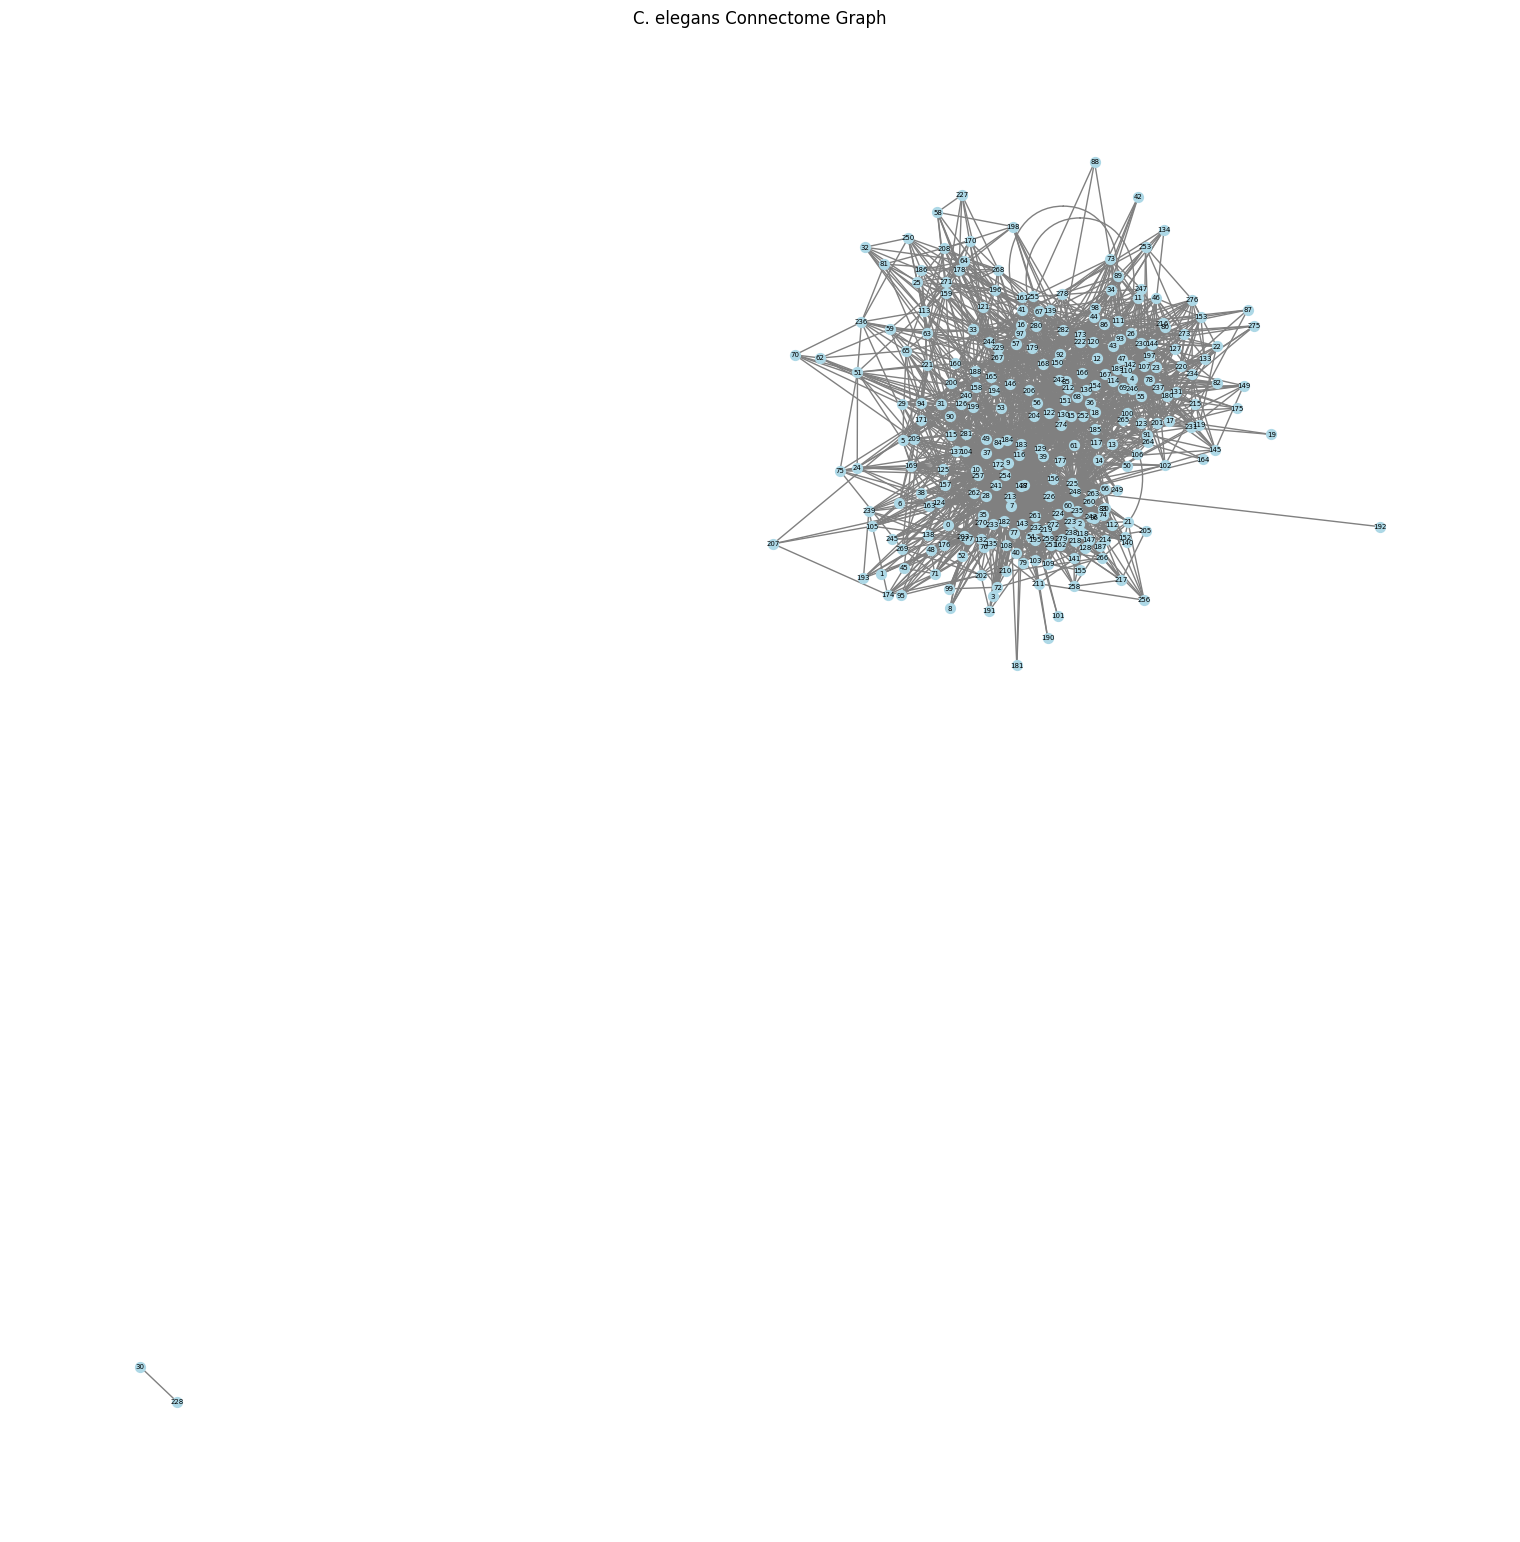

In [ ]:
# Create an adjacency matrix
nodes = list(set(df['Neuron 1']).union(set(df['Neuron 2'])))
adj_matrix = pd.DataFrame(0, index=nodes, columns=nodes)

for i, row in df.iterrows():
    adj_matrix.at[row['Neuron 1'], row['Neuron 2']] = row['Nbr']
    adj_matrix.at[row['Neuron 2'], row['Neuron 1']] = row['Nbr']

# Convert the adjacency matrix to a numpy array
adj_matrix = adj_matrix.values

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Use a spring layout for better node positioning
pos = nx.spring_layout(G, k=0.1, iterations=50)

# Visualize the graph with improved settings
plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_size=50, node_color='lightblue', font_size=5, edge_color='gray')
plt.title('C. elegans Connectome Graph')
plt.show()

In [ ]:
!pip install pyvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.7 MB/s eta 0:00:00


In [ ]:
from pyvis.network import Network

# Create a Pyvis network with CDN resources set to 'in_line'
net = Network(notebook=True, height="750px", width="100%", cdn_resources='in_line')

# Get unique nodes
nodes = list(set(df['Neuron 1']).union(set(df['Neuron 2'])))

# Add nodes and edges
for i, node in enumerate(nodes):
    net.add_node(i, label=node)

for i, row in df.iterrows():
    net.add_edge(nodes.index(row['Neuron 1']), nodes.index(row['Neuron 2']), value=row['Nbr'])

# Show the network
net.show("c_elegans_connectome.html")


c_elegans_connectome.html
